In [13]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from datetime import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sn
from scipy import stats

In [7]:
f1 = open(r'C:\Users\苗婧\Desktop\TULIP Academy\kagglebike\train.csv')
train=pd.read_csv(f1)
f2=open(r'C:\Users\苗婧\Desktop\TULIP Academy\kagglebike\test.csv')
test=pd.read_csv(f2)

In [8]:
#查看训练数据
print('训练数据大小:',train.shape,'测试数据大小:',test.shape)

训练数据大小: (10886, 12) 测试数据大小: (6493, 9)


In [9]:
#查看数据类型
print('训练数据类型',train.info(),'测试数据类型',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

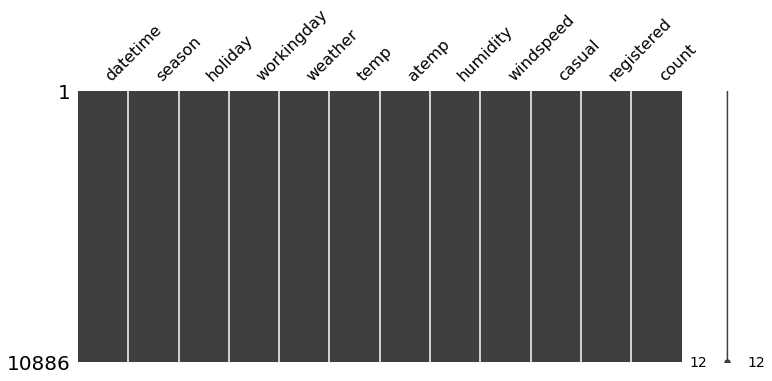

In [14]:
#缺失数据可视化
msno.matrix(train,figsize=(12,5),color=(0.25, 0.25, 0.25))
plt.show()

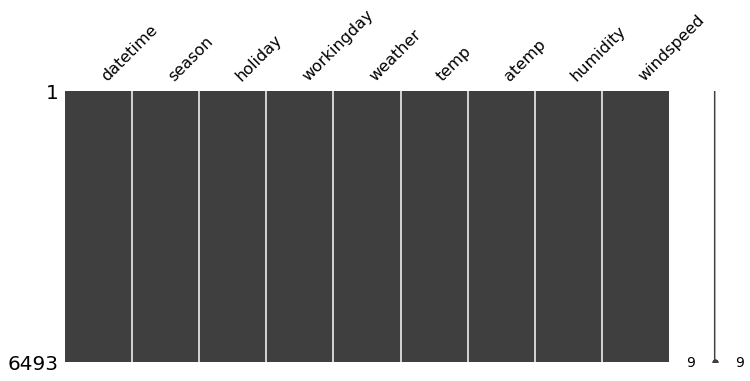

In [15]:
msno.matrix(test,figsize=(12,5),color=(0.25, 0.25, 0.25))
plt.show()

In [16]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [17]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [18]:
print('训练数据内容:')
train.head()

训练数据内容:


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
print('测试数据内容:')
test.head()

测试数据内容:


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


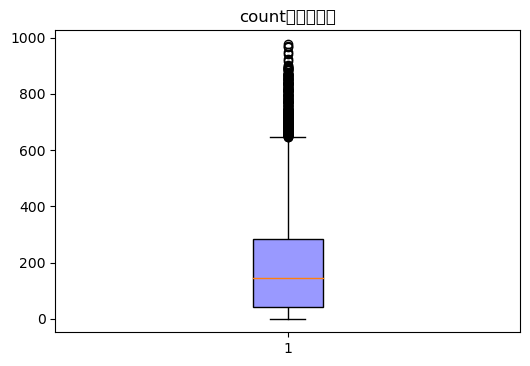

In [20]:
plt.figure(dpi=100)
plt.boxplot(train['count'],patch_artist=True,boxprops={'color':'black','facecolor':'#9999ff'})
plt.title('count列数据分布')
plt.show()

In [21]:
# 过滤异常值 3西格玛
trainWithoutOutliers= train[np.abs(train['count']-train['count'].mean())<=3*train['count'].std()]
print('过滤后的数据大小:',trainWithoutOutliers.shape)

过滤后的数据大小: (10739, 12)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

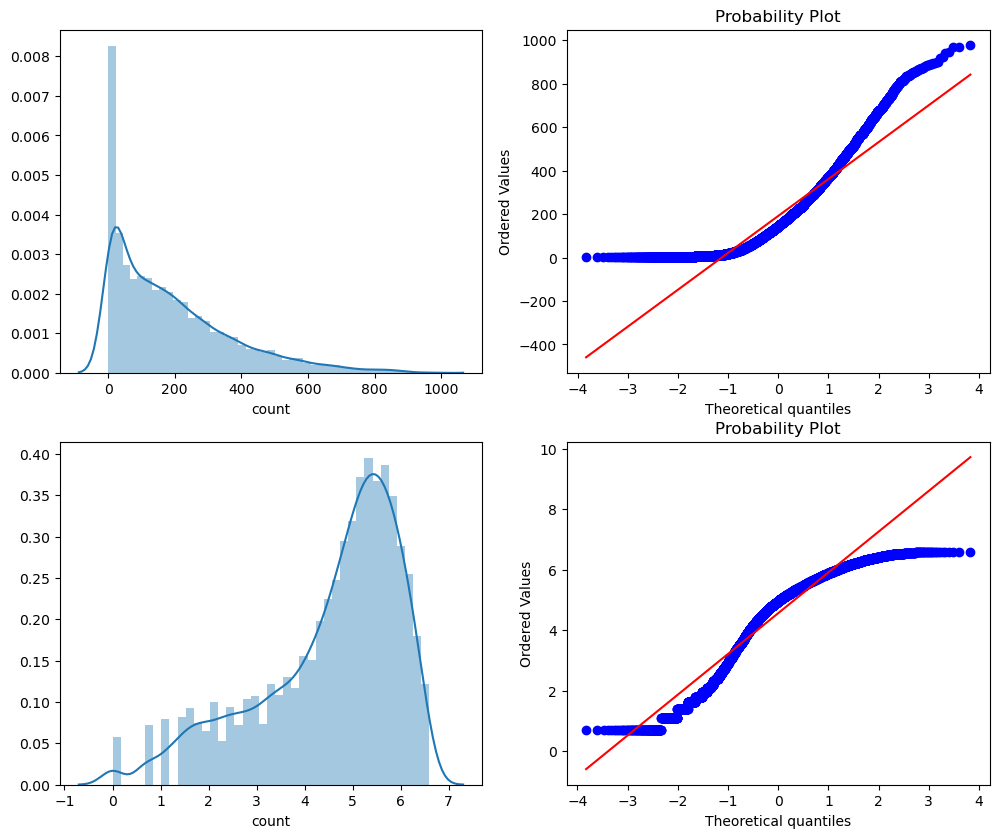

In [22]:
#绘制密度图查看count列数据
fig,axes = plt.subplots(2,2,dpi=100)
fig.set_size_inches(12, 10)
sn.distplot(train["count"],ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sn.distplot(np.log(trainWithoutOutliers["count"]),ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

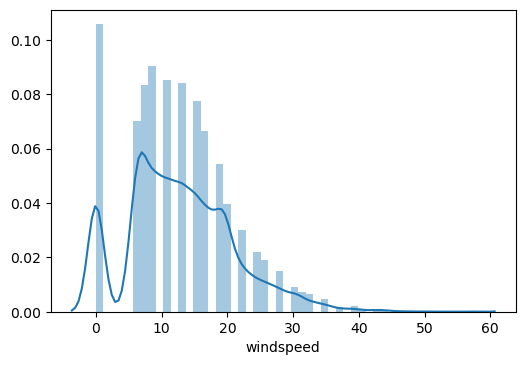

In [23]:
plt.figure(dpi=100)
sn.distplot(train["windspeed"])

In [24]:
#时间序列转换成单独年月日
data_Df=trainWithoutOutliers
data_Df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [25]:
# 分割时间日期字符串
# 为了方便后面特征的提取我们把时间日期的字符串转换成数值型
data_Df['year']=data_Df['datetime'].map(lambda x :x.split(' ')[0].split('-')[0]).astype('int')
data_Df['month']=data_Df['datetime'].apply(lambda x :x.split(' ')[0].split('-')[1]).astype('int')
data_Df['day']=data_Df['datetime'].map(lambda x :x.split(' ')[0].split('-')[2]).astype('int')
data_Df['hour']=data_Df['datetime'].map(lambda x :x.split(' ')[1].split(':')[0]).astype('int')
data_Df['weekday']=data_Df['datetime'].apply(lambda x : pd.to_datetime(x,format='%Y-%m-%d').weekday())
data_Df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [26]:
data_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10739 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10739 non-null  object 
 1   season      10739 non-null  int64  
 2   holiday     10739 non-null  int64  
 3   workingday  10739 non-null  int64  
 4   weather     10739 non-null  int64  
 5   temp        10739 non-null  float64
 6   atemp       10739 non-null  float64
 7   humidity    10739 non-null  int64  
 8   windspeed   10739 non-null  float64
 9   casual      10739 non-null  int64  
 10  registered  10739 non-null  int64  
 11  count       10739 non-null  int64  
 12  year        10739 non-null  int32  
 13  month       10739 non-null  int32  
 14  day         10739 non-null  int32  
 15  hour        10739 non-null  int32  
 16  weekday     10739 non-null  int64  
dtypes: float64(3), int32(4), int64(9), object(1)
memory usage: 1.3+ MB


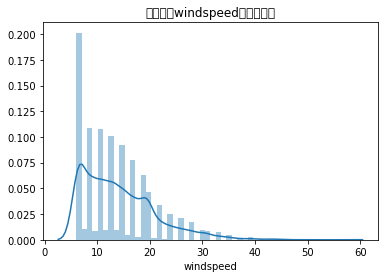

In [27]:
#使用随机森林填充windspeed列异常值
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data_Df[data_Df["windspeed"]==0]
dataWindNot0 = data_Df[data_Df["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","temp","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data_Df = dataWindNot0.append(dataWind0)
data_Df.reset_index(inplace=True,drop=True)

sn.distplot(data_Df["windspeed"])
plt.title('填充后的windspeed密度分布图')
plt.show()

Text(0.5, 1.0, 'Heatmap of correlation')

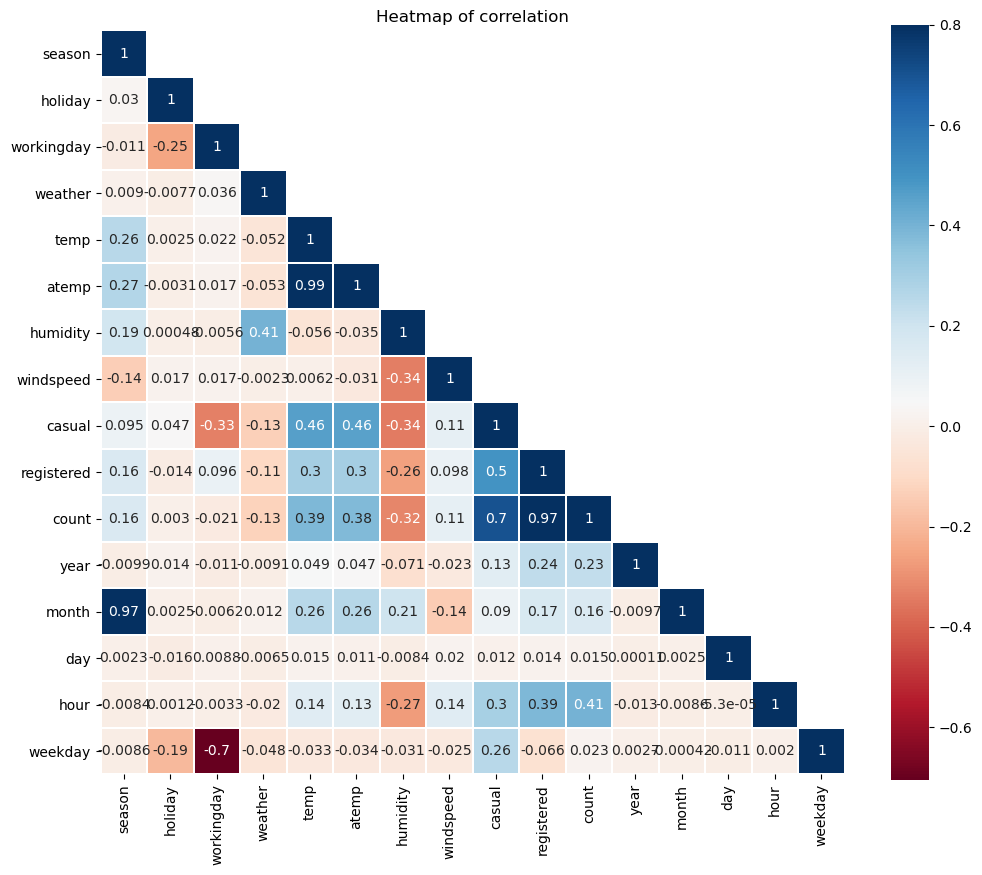

In [28]:
#相关性分析
corrDf=data_Df.corr()
fig,axes=plt.subplots(1,1,dpi=100)
fig.set_size_inches(12, 10)
mask = np.array(corrDf)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrDf,linewidths=0.5,mask=mask,vmax=.8,square=True,annot=True,linecolor='w',cmap='RdBu')
plt.title('Heatmap of correlation')

In [29]:
#排序
corrDf=corrDf.sort_values(by='count',ascending=False)
corrDf['count']

count         1.000000
registered    0.966209
casual        0.704764
hour          0.405437
temp          0.385954
atemp         0.381967
year          0.234959
month         0.164673
season        0.159801
windspeed     0.113991
weekday       0.022602
day           0.015184
holiday       0.002978
workingday   -0.020764
weather      -0.127519
humidity     -0.317028
Name: count, dtype: float64

In [30]:
#时间类不同纬度
month_Df=data_Df.groupby(['month','year']).sum().unstack()['count']
season_Df=data_Df.groupby(['hour','season']).mean().unstack()['count']
season_Df.columns=['Spring','Summer','Fall','Winter']
season_Df.head()
holiday_Df= data_Df.groupby(['hour', 'holiday']).mean().unstack()['count'].rename(columns={0:'非节假日',1:'节假日'})
workingday_Df= data_Df.groupby(['hour', 'workingday']).mean().unstack()['count'].rename(columns={0:'周末',1:'工作日'})
month_Df.head()

year,2011,2012
month,,
1,23552,56332
2,32844,66269
3,38735,91688
4,50517,108441
5,79713,111564


In [31]:
# 获取所有自带样式
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


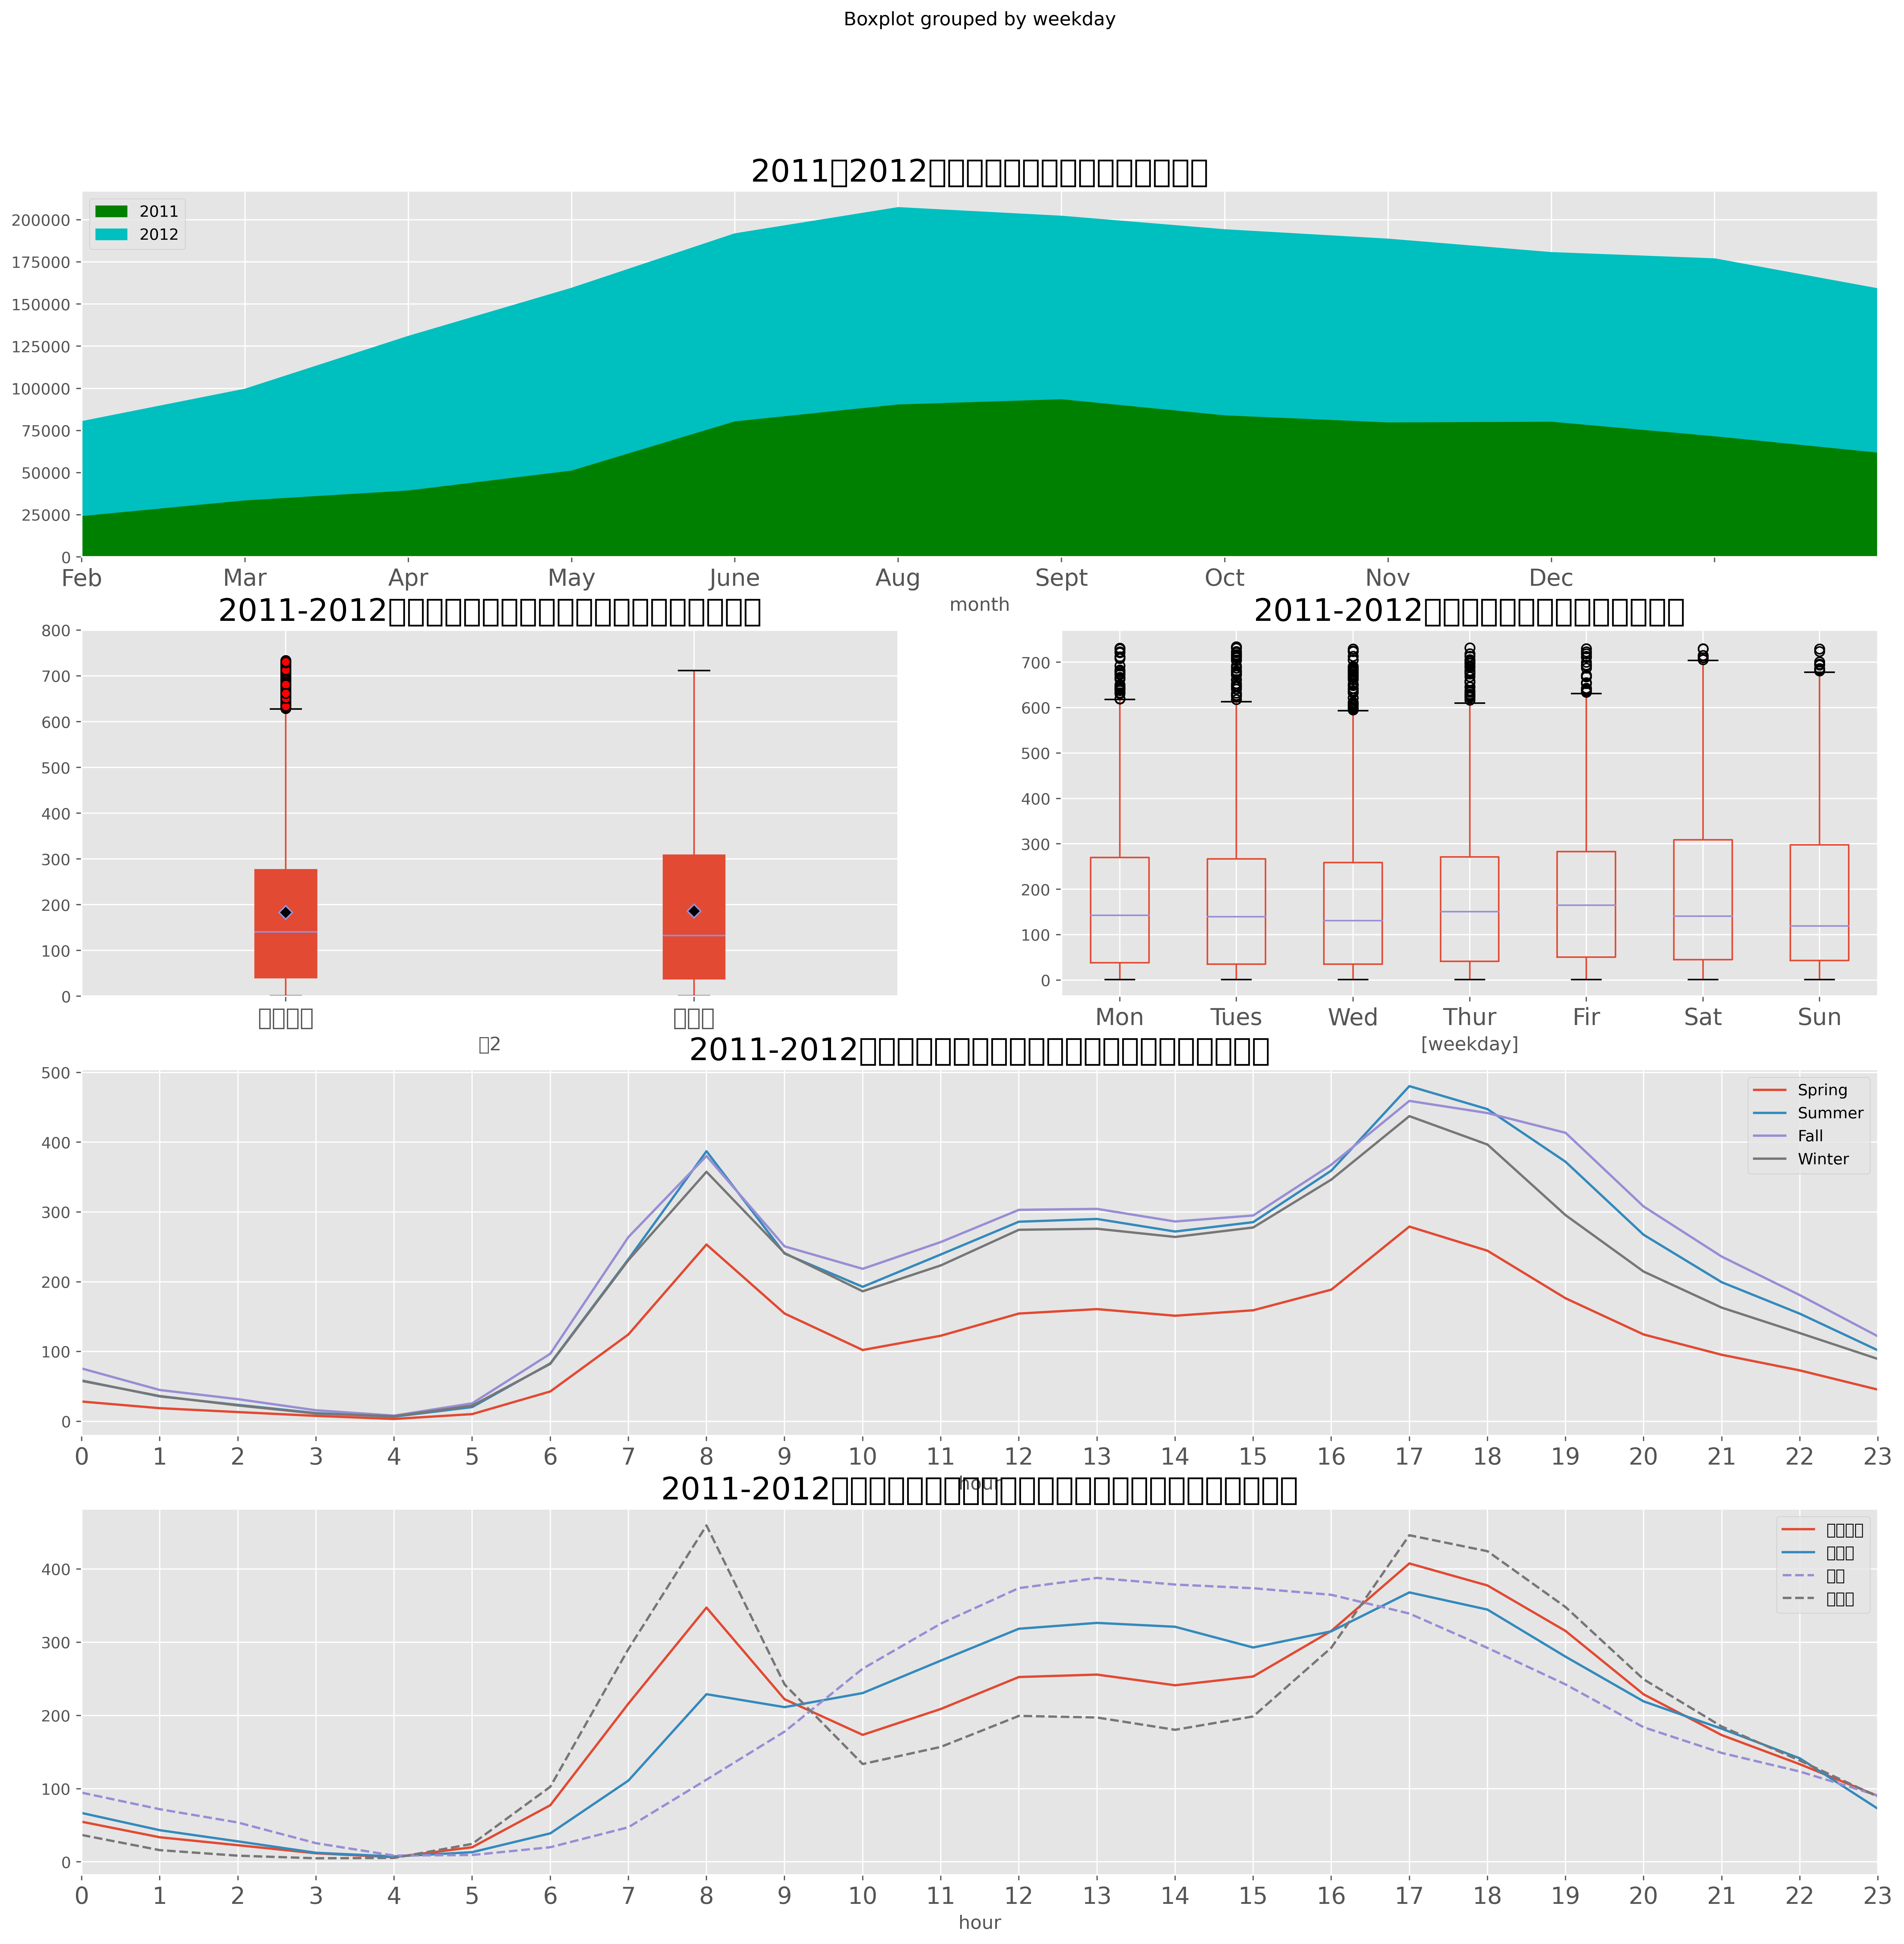

In [32]:
plt.style.use('ggplot') 
fig=plt.figure(2,figsize=(20,20),dpi=400)

ax1=plt.subplot(4,1,1)
ax2=plt.subplot(4,2,3)
ax3=plt.subplot(4,2,4)
ax4=plt.subplot(4,1,3)
ax5=plt.subplot(4,1,4)
# 月份
month_Df.plot(kind='area',ax=ax1,title='2011和2012美国某城市每月共享单车租借数量',color=['g','c'])
ax1.set_title('2011和2012美国某城市每月共享单车租借数量',fontsize=20)
ax1.set_xticks(list(range(12)))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','Aug','Sept','Oct','Nov','Dec'],fontsize=15)
ax1.set_xlim(1,12)
ax1.legend(loc='upper left')

#节假日
holiday_boxplot=data_Df[['holiday','count']].boxplot(by='holiday',ax=ax2,patch_artist=True,showmeans=True,boxprops={'color':'black','facecolor':'#9999ff'},
                                                       flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},meanprops = {'marker':'D','markerfacecolor':'k'})
ax2.set_title('2011-2012美国某城市节假日与非节假日共享单车使用量',fontsize=20)
ax2.set_xlabel('图2')
ax2.set_xticklabels(['非节假日','节假日'], rotation='horizontal',fontsize=15)
ax2.set_ylim(0,800)

# 星期 
weekday_boxplot=data_Df[['weekday','count']].boxplot(by='weekday',ax=ax3)
ax3.set_title('2011-2012美国某城市日均共享单车使用量',fontsize=20)
ax3.set_xticklabels(['Mon','Tues','Wed','Thur','Fir','Sat','Sun'],fontsize=15)

# 季节
season_Df.plot(ax=ax4)
ax4.set_title('2011-2012美国某城市不同季节不同时刻共享单车平均使用量',fontsize=20)
ax4.set_xticks(list(range(24)))
ax4.set_xticklabels(list(range(24)),fontsize=15)
ax4.set_xlim(0,23)

holiday_Df.plot(ax=ax5)
workingday_Df.plot(ax=ax5,style='--')
ax5.set_title('2011-2012美国某城市工作日和节假日不同时刻共享单车平均使用量',fontsize=20)

ax5.set_xticks(list(range(24)))
ax5.set_xticklabels(list(range(24)),fontsize=15)
ax5.set_xlim(0,23)
ax5.legend(loc=0)

plt.show()

Text(0, 0.5, '租车总数')

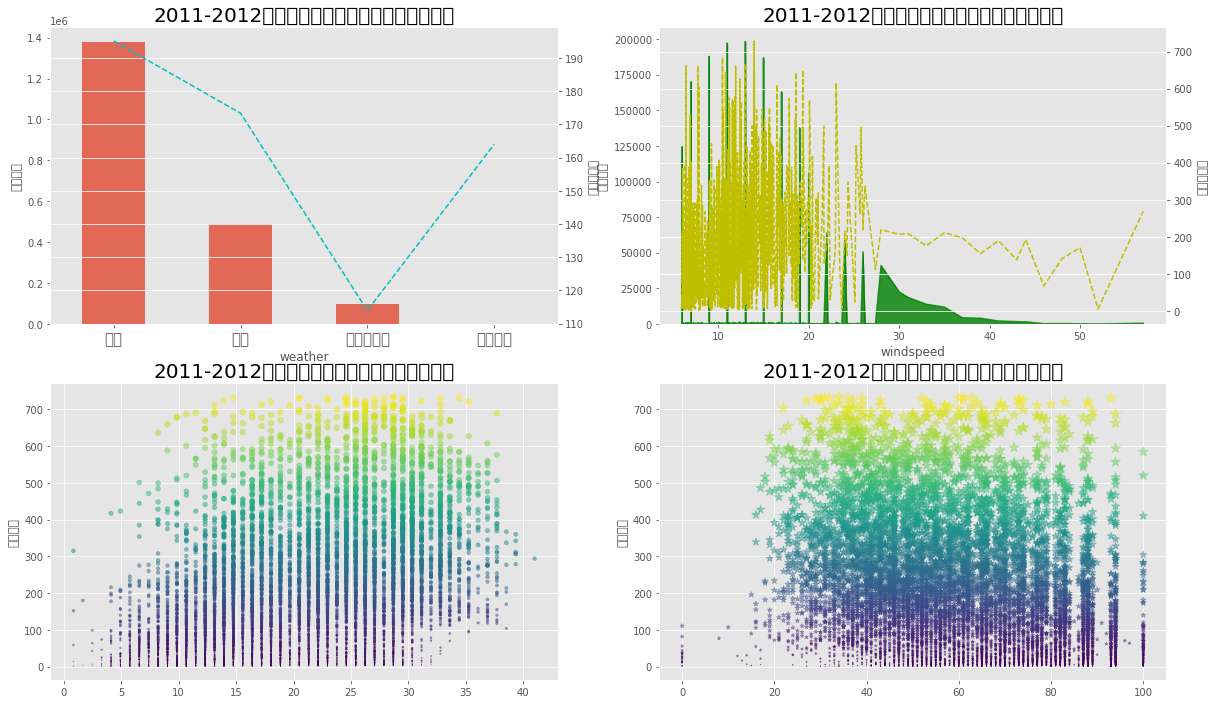

In [33]:
# 天气类别不同纬度
fig=plt.figure(figsize=(20,12))

# 天气
ax1=fig.add_subplot(2,2,1)
weather_Df1=data_Df.groupby('weather').sum()['count']
weather_Df1.plot(kind='bar',ax=ax1,alpha=0.8,width=0.5)
weather_Df2=data_Df.groupby('weather').mean()['count'].reset_index(drop=True)# 为了使曲线图与柱状图对其所以重置索引
weather_Df2.plot(secondary_y=True,style='--c',ax=ax1)
ax1.set_title('2011-2012美国某城市不同天气共享单车使用量',fontsize=20)
ax1.set_ylabel('租车总数')
ax1.right_ax.set_ylabel('租车平均数')
ax1.set_xticks(weather_Df2.index)
ax1.set_xticklabels(['晴天','阴天','小雨或小雪','恶劣天气'],rotation='horizontal',fontsize=15)

# 风速
ax2=fig.add_subplot(2,2,2)
windspeed_Df1=data_Df.groupby('windspeed').sum()['count']
windspeed_Df1.plot(kind='area',ax=ax2,style='g',alpha=0.8)
windspeed_Df2=data_Df.groupby('windspeed').mean()['count']# 为了使曲线图与柱状图对其所以重置索引
windspeed_Df2.plot(secondary_y=True,style='y--',ax=ax2)
ax2.set_title('2011-2012美国某城市不同风速共享单车使用量',fontsize=20)
ax2.set_ylabel('租车总数')
ax2.right_ax.set_ylabel('租车平均数')

# 温度
ax3=fig.add_subplot(2,2,3)
ax3.scatter(data_Df['temp'],data_Df['count'], s=data_Df['count']/5, c=data_Df['count'], marker='.', alpha=0.5)
ax3.set_title('2011-2012美国某城市不同温度共享单车使用量',fontsize=20)
ax3.set_ylabel('租车总数')

# 湿度
ax4=fig.add_subplot(2,2,4)
ax4.scatter(data_Df['humidity'],data_Df['count'], s=data_Df['count']/5, c=data_Df['count'], marker='*', alpha=0.5)
ax4.set_title('2011-2012美国某城市不同湿度共享单车使用量',fontsize=20)
ax4.set_ylabel('租车总数')